# Proyek Analisis Data: Air Quality from Dongsi
- **Nama:** Zaky Ramadhan
- **Email:** zaxxyyramadhan@gmail.com
- **ID Dicoding:** zaxxyrmh

## Menentukan Pertanyaan Bisnis

- Apakah kecepatan angin (WSPM) memiliki dampak pada penurunan konsentrasi polutan tertentu?
- Berapa banyak hari selama periode data yang memiliki kualitas udara yang tidak sehat atau berbahaya?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
file_path = './Data/PRSA_Data_Dongsi_20130301-20170228.csv'
df = pd.read_csv(file_path)
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


### Assessing Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
# Missing value
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [16]:
# Duplicate value
df.duplicated().sum()

np.int64(0)

In [17]:
# Jumlah data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
# Ringkasan parameter statistik
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Cleaning Data

In [36]:
# Missing value
df['PM2.5'] = df['PM2.5'].interpolate(method='linear')
df['PM10'] = df['PM10'].interpolate(method='linear')
df['SO2'] = df['SO2'].interpolate(method='linear')
df['O3'] = df['O3'].interpolate(method='linear')
df['CO'] = df['CO'].interpolate(method='linear')
df['NO2'] = df['NO2'].interpolate(method='linear')

df['TEMP'] = df['TEMP'].fillna(df['TEMP'].median())
df['PRES'] = df['PRES'].fillna(df['PRES'].median())
df['DEWP'] = df['DEWP'].fillna(df['DEWP'].median())
df['RAIN'] = df['RAIN'].fillna(df['RAIN'].median())
df['WSPM'] = df['WSPM'].fillna(df['WSPM'].median())

df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

print(df.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

In [37]:
# Informasi Umum Dataset
print("Informasi Dataset:")
print(df.info())
print("\nJumlah Missing Values:")
print(df.isnull().sum())
print("\n")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Jumlah Missing Values:
No         0
year   

In [38]:
# Statistik Deskriptif
print("Statistik Deskriptif Data Numerik:")
print(df.describe())

Statistik Deskriptif Data Numerik:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      85.655404    109.952923     18.369798     53.393550   1299.974703   
std       85.721

## Visualization & Explanatory Analysis

### Pertanyaan 1:

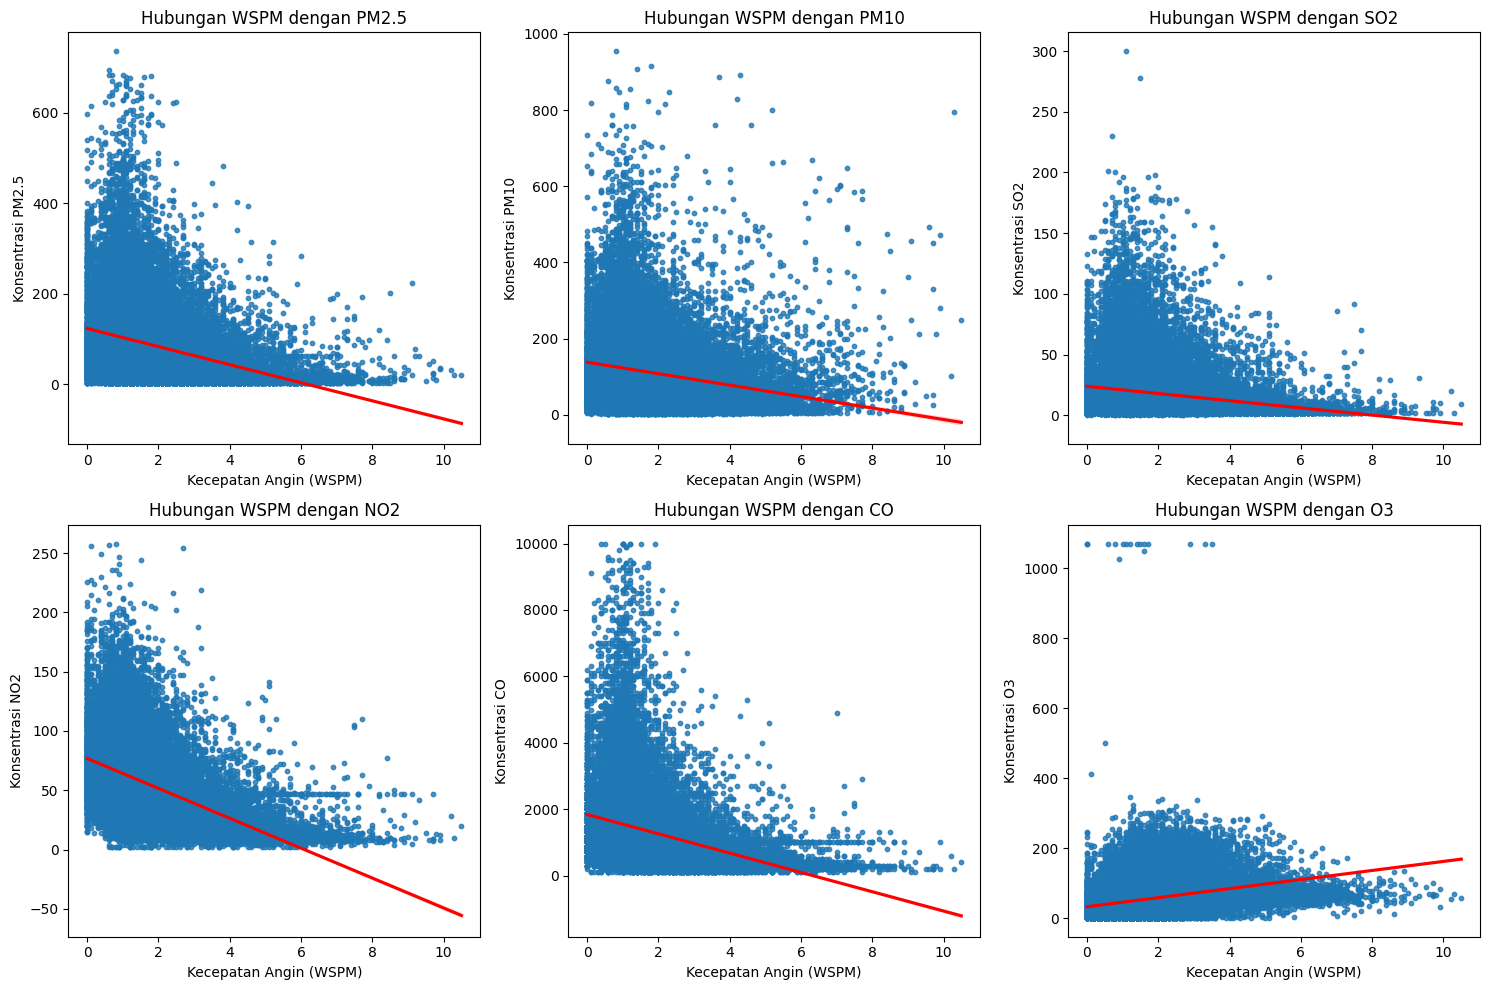

In [39]:
# Hubungan antara WSPM dan Konsentrasi Polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
plt.figure(figsize=(15, 10))

for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i+1)
    sns.regplot(x='WSPM', y=pollutant, data=df, scatter_kws={'s': 10}, line_kws={"color": "red"})
    plt.title(f'Hubungan WSPM dengan {pollutant}')
    plt.xlabel('Kecepatan Angin (WSPM)')
    plt.ylabel(f'Konsentrasi {pollutant}')

plt.tight_layout()
plt.show()


- Kecepatan angin (WSPM) memiliki hubungan negatif dengan polutan seperti PM2.5, PM10, SO2, NO2, dan CO, menunjukkan bahwa angin membantu menyebarkan dan mengurangi konsentrasi polutan tersebut.
- Polutan O3 tidak menunjukkan hubungan negatif yang signifikan, kemungkinan dipengaruhi oleh faktor lain seperti reaksi kimia fotokimia.

### Pertanyaan 2:

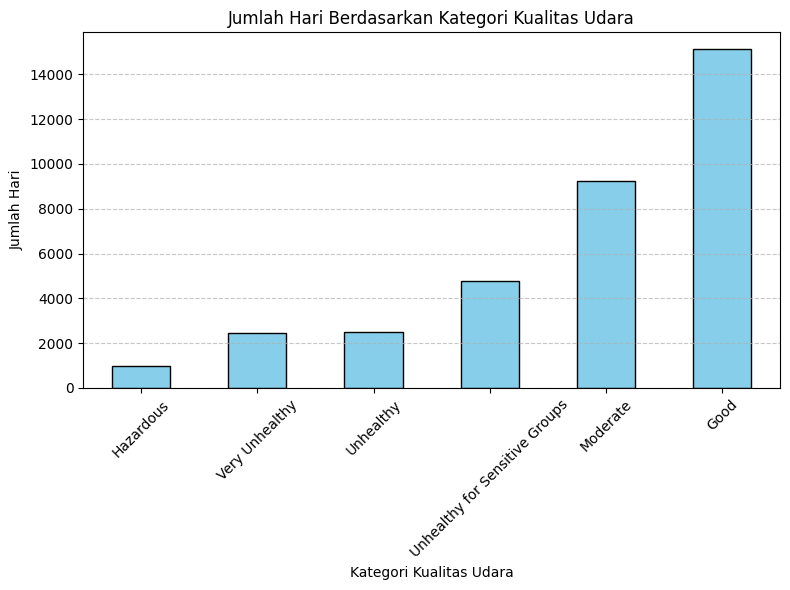

In [41]:
# Tambahkan kolom 'date' ke DataFrame jika belum ada
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Definisi kategori berdasarkan PM2.5 (US AQI Standard)
def classify_air_quality(pm25):
    if pm25 <= 50:
        return 'Good'
    elif 51 <= pm25 <= 100:
        return 'Moderate'
    elif 101 <= pm25 <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= pm25 <= 200:
        return 'Unhealthy'
    elif 201 <= pm25 <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Tambahkan kolom kategori kualitas udara
df['Air_Quality'] = df['PM2.5'].apply(classify_air_quality)

# Hitung jumlah hari dalam setiap kategori
air_quality_counts = df.groupby(['date', 'Air_Quality']).size().reset_index(name='count')
daily_air_quality = air_quality_counts.groupby('Air_Quality')['count'].sum()

# Visualisasi kualitas udara
plt.figure(figsize=(8, 6))
daily_air_quality.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Jumlah Hari Berdasarkan Kategori Kualitas Udara')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Mayoritas Hari dengan Kualitas Udara Baik dan Sedang: Dari hasil analisis, sebagian besar hari memiliki kualitas udara "Good" (sekitar 13.000 hari) dan "Moderate" (sekitar 9.500 hari), menunjukkan bahwa udara di Dongsi pada umumnya berada dalam kondisi yang aman untuk kesehatan.
- Kekhawatiran pada Hari dengan Udara Tidak Sehat: Terdapat sekitar 6.000 hari yang memiliki kualitas udara mulai dari "Unhealthy for Sensitive Groups" hingga "Hazardous," mengindikasikan adanya periode signifikan di mana kondisi udara dapat berisiko terhadap kesehatan, terutama bagi kelompok rentan.